<a href="https://colab.research.google.com/github/ortegatiago/covid19_analysis/blob/master/covid19_prediction_phophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COVID 19 Predictions using python Facebook Prophet**

Author: Ortega, Tiago

email: ortega.tiago@gmail.com

github: https://github.com/ortegatiago

linkedin: https://www.linkedin.com/in/ortegatiago/

Facebook Prophet Documentations

https://facebook.github.io/prophet/docs/quick_start.html#python-api


https://facebook.github.io/prophet/


In [14]:
import pandas as pd
from fbprophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/consolidated_covid_19_data.csv', sep=',', encoding='utf-8')
df['Last_Update'] = pd.to_datetime(df['Last_Update'])
df['Last_Update'] = df['Last_Update'].dt.date
df['Last_Update'] = pd.to_datetime(df['Last_Update'])

df = df[['Country_Region','Last_Update', 'Confirmed', 'Deaths', 'Recovered']]
df.tail()

,Country_Region,Last_Update,Confirmed,Deaths,Recovered
425508,West Bank and Gaza,2020-04-29,343,2,71
425509,Western Sahara,2020-04-29,6,0,5
425510,Yemen,2020-04-29,1,0,1
425511,Zambia,2020-04-29,95,3,42
425512,Zimbabwe,2020-04-29,32,4,5


In [17]:
df_p = df.loc[df['Country_Region']=='Brazil',  ['Last_Update', 'Confirmed']].copy()
df_p = df_p.groupby('Last_Update').sum().reset_index()
df_p.rename({'Last_Update':'ds', 'Confirmed':'y'}, inplace=True, axis=1)
df_p['y'] = np.log(df_p['y'])
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      124 non-null    datetime64[ns]
 1   y       124 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.1 KB


In [18]:
model = Prophet(growth='linear', interval_width=0.90)
model.fit(df_p)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
df_p.shape

(124, 2)

In [20]:
future = model.make_future_dataframe(periods=30)
future.shape

(154, 1)

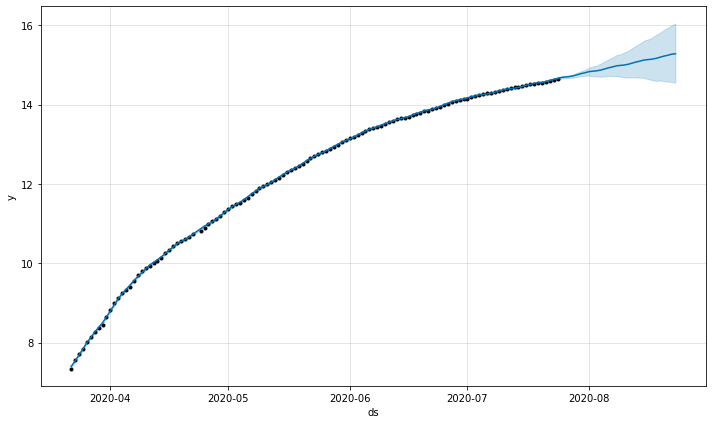

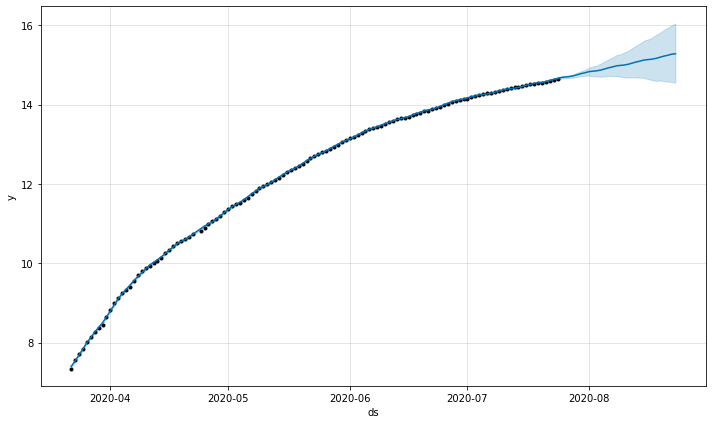

In [21]:
forecast = model.predict(future)
model.plot(forecast)

In [22]:
def plot_covid19_data(countries, case='Confirmed', periods=7, log=False, peak=False):
  w = len(countries)
  i = 1

  for country in countries:
    df_p = df.loc[df['Country_Region']==country,  ['Last_Update', case]].copy()
    df_p = df_p.groupby('Last_Update').sum().reset_index()
    df_p.rename({'Last_Update':'ds', case:'y'}, inplace=True, axis=1)

    if log:
      df_p['y'] = np.log(df_p['y'])

      #d.index = np.log(d.index)
    model = Prophet(growth='linear', interval_width=0.95)
    model.fit(df_p)
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    fig1 = model.plot(forecast)

    plt.xlabel("Date")
    plt.ylabel("Cases "+case)
    plt.xticks(rotation = 90)
    plt.title("COVID 19 Predictions - "+country)

    if peak:
      min = forecast.loc[forecast['ds']==forecast['ds'].min(), ['ds','yhat']]
      max = forecast.loc[forecast['ds']==forecast['ds'].max(), ['ds','yhat']]
      max['yhat'] = df_p.loc[df_p['ds'] == df_p['ds'].max(), 'y'].max()
      min['yhat'] = df_p.loc[df_p['ds'] == df_p['ds'].max(), 'y'].max()
      max.set_index('ds', inplace=True)
      min.set_index('ds', inplace=True)
      n = pd.concat([min,max], axis=0)
      n.plot(ax=fig1.axes[0], color='r', legend=False, kind='line',grid=True)
    i=i+1

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


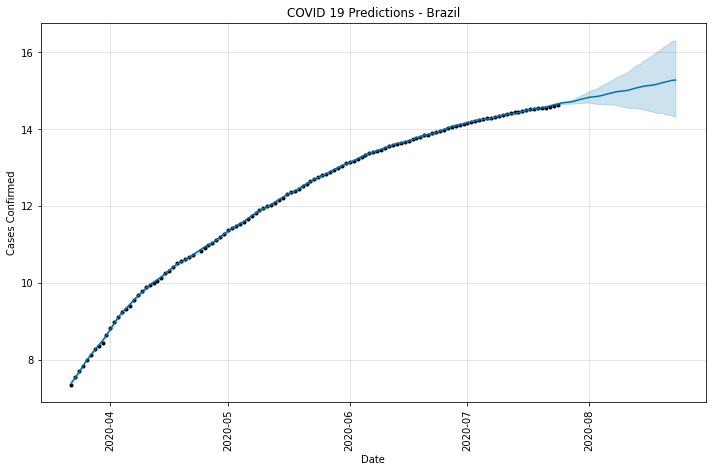

In [30]:
plot_covid19_data(['Brazil'], case='Confirmed', periods=30, log=True, peak=False)